In [17]:
!unzip '/content/drive/MyDrive/yolo/archive(3).zip'

Archive:  /content/drive/MyDrive/yolo/archive(3).zip
replace d6-dice/Annotations/IMG_20191208_111228.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: d6-dice/Annotations/IMG_20191208_111228.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111246.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111304.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111316.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111328.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111339.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111352.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111411.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111423.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111434.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111446.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111457.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111530.txt  
  inflating: d6-dice/Annotations/IMG_20191208_111548.txt  
  inflating: d6-dice/Annotat

In [35]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import tensorflow as tf
import pandas as pd

In [54]:
img_path='/content/d6-dice/Images'
labels_path='/content/d6-dice/Annotations'

img_file=os.listdir(img_path)
labels_file=os.listdir(labels_path)
len(img_file),len(labels_file)

(250, 251)

In [55]:
for dirpath,dirname,filename in os.walk('/content/d6-dice'):
  print(f'{len(dirname)}, {len(filename)}, {dirpath}')

2, 0, /content/d6-dice
0, 250, /content/d6-dice/Images
1, 250, /content/d6-dice/Annotations
0, 0, /content/d6-dice/Annotations/.ipynb_checkpoints


In [56]:
labels_file=sorted(labels_file)
labels_file

['.ipynb_checkpoints',
 'IMG_20191208_111228.txt',
 'IMG_20191208_111246.txt',
 'IMG_20191208_111304.txt',
 'IMG_20191208_111316.txt',
 'IMG_20191208_111328.txt',
 'IMG_20191208_111339.txt',
 'IMG_20191208_111352.txt',
 'IMG_20191208_111411.txt',
 'IMG_20191208_111423.txt',
 'IMG_20191208_111434.txt',
 'IMG_20191208_111446.txt',
 'IMG_20191208_111457.txt',
 'IMG_20191208_111530.txt',
 'IMG_20191208_111548.txt',
 'IMG_20191208_111628.txt',
 'IMG_20191208_111642.txt',
 'IMG_20191208_111650.txt',
 'IMG_20191208_111702.txt',
 'IMG_20191208_111710.txt',
 'IMG_20191208_111718.txt',
 'IMG_20191208_111730.txt',
 'IMG_20191208_111742.txt',
 'IMG_20191208_111751.txt',
 'IMG_20191208_111803.txt',
 'IMG_20191208_111816.txt',
 'IMG_20191208_111820.txt',
 'IMG_20191208_111826.txt',
 'IMG_20191208_111833.txt',
 'IMG_20191208_111847.txt',
 'IMG_20191208_111858.txt',
 'IMG_20191208_111904.txt',
 'IMG_20191208_111913.txt',
 'IMG_20191208_111919.txt',
 'IMG_20191208_111924.txt',
 'IMG_20191208_111932.txt

In [57]:
labels_file=sorted(labels_file)[1:]

In [58]:
len(labels_file)

250

In [59]:
img_file=sorted(img_file)

In [60]:
img_file[:5],labels_file[:5]

(['IMG_20191208_111228.jpg',
  'IMG_20191208_111246.jpg',
  'IMG_20191208_111304.jpg',
  'IMG_20191208_111316.jpg',
  'IMG_20191208_111328.jpg'],
 ['IMG_20191208_111228.txt',
  'IMG_20191208_111246.txt',
  'IMG_20191208_111304.txt',
  'IMG_20191208_111316.txt',
  'IMG_20191208_111328.txt'])

In [61]:
len(img_file),len(labels_file)

(250, 250)

In [62]:
img_file[0],labels_file[0]

('IMG_20191208_111228.jpg', 'IMG_20191208_111228.txt')

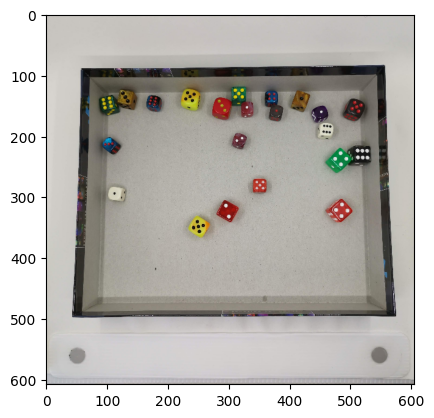

In [63]:
i=plt.imread(os.path.join(img_path,img_file[0]))
i=cv.resize(i,(606,608))
plt.imshow(i)
plt.show()

In [64]:
with open(os.path.join(labels_path,labels_file[0])) as f:
  text=f.readlines()

In [65]:
os.path.join(labels_path,labels_file[0])

'/content/d6-dice/Annotations/IMG_20191208_111228.txt'

In [66]:
labels=[]

for j in text:
  labels.append(list(map(float,j.split(' '))))

labels=np.array(labels)

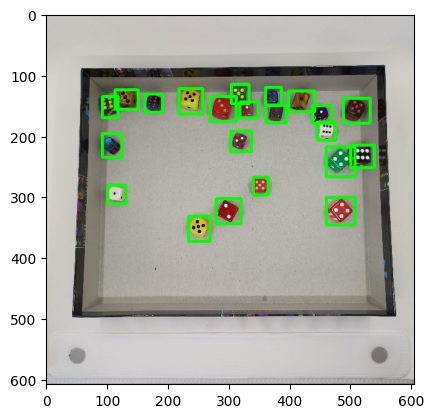

In [67]:
x1=(labels[:,1]-labels[:,4]/2)*608
x2=(labels[:,1]+labels[:,4]/2)*608
y1=(labels[:,2]-labels[:,3]/2)*608
y2=(labels[:,2]+labels[:,3]/2)*608

x1=x1.astype(np.int32)
x2=x2.astype(np.int32)
y1=y1.astype(np.int32)
y2=y2.astype(np.int32)

temp=i.copy()

for k in range(len(labels)):
  temp=cv.rectangle(temp,(x1[k],y1[k]),(x2[k],y2[k]),(0,255,0),4)

plt.imshow(temp)

In [71]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd
import glob

In [72]:
def feat(layer,filters,kernel=1):
  x=layers.Conv2D(filters,kernel,activation='relu')(layer)
  x=layers.BatchNormalization()(x)
  x=layers.LeakyReLU()(x)

  return x


In [75]:


input_layer=layers.Input(shape=(448,448,3))
x=feat(layer=input_layer,filters=32,kernel=1)
x=layers.MaxPool2D()(x)

x=feat(layer=x,filters=64,kernel=1)
x=layers.MaxPool2D()(x)
x=feat(layer=x,filters=32,kernel=1)
x=layers.MaxPool2D()(x)

x=feat(layer=x,filters=128,kernel=1)
x=feat(layer=x,filters=64,kernel=1)
x=feat(layer=x,filters=128,kernel=1)
x=layers.MaxPool2D()(x)

x=feat(layer=x,filters=256,kernel=1)
x=feat(layer=x,filters=128,kernel=1)
x=feat(layer=x,filters=256,kernel=1)
x=layers.MaxPool2D()(x)

residuals=feat(layer=x,filters=64,kernel=1)
residuals=tf.nn.space_to_depth(residuals,block_size=2)

x=feat(layer=x,filters=256,kernel=1)
x=feat(layer=x,filters=128,kernel=1)
x=feat(layer=x,filters=256,kernel=1)
x=layers.MaxPool2D()(x)

x=feat(layer=x,filters=512,kernel=1)
x=feat(layer=x,filters=256,kernel=1)
x=feat(layer=x,filters=512,kernel=1)

x=feat(layer=x,filters=256,kernel=1)
x=feat(layer=x,filters=512,kernel=1)

# residuals=feat(layer=x,filters=64,kernel=1)
# residuals=tf.nn.space_to_depth(residuals,block_size=2)

# x=layers.MaxPool2D()(x)
# x=feat(layer=x,filters=1024,kernel=1)
# x=feat(layer=x,filters=512,kernel=1)
# x=feat(layer=x,filters=1024,kernel=1)
# x=feat(layer=x,filters=512,kernel=1)
# x=feat(layer=x,filters=1024,kernel=1)
# x=feat(layer=x,filters=512,kernel=1)
# x=feat(layer=x,filters=512,kernel=1)

x=layers.Concatenate(axis=-1)([x,residuals])

x=feat(layer=x,filters=512,kernel=1)
# x=layers.Conv2D(filters=1024,kernel_size=1,activation='relu')(x)

# x=layers.Flatten()(x)
# x=layers.Dense(512)(x)
# x=layers.Dropout(0.5)(x)
# x=layers.Dense(1024)(x)
# x=layers.Dropout(0.5)(x)
# output_layer=layers.Dense(1078,activation='sigmoid')(x)
# x=layers.Dropout(0.5)(x)

output_layer=layers.Conv2D(filters=22,kernel_size=1,activation='sigmoid')(x)




model=tf.keras.models.Model(inputs=input_layer,outputs=output_layer)

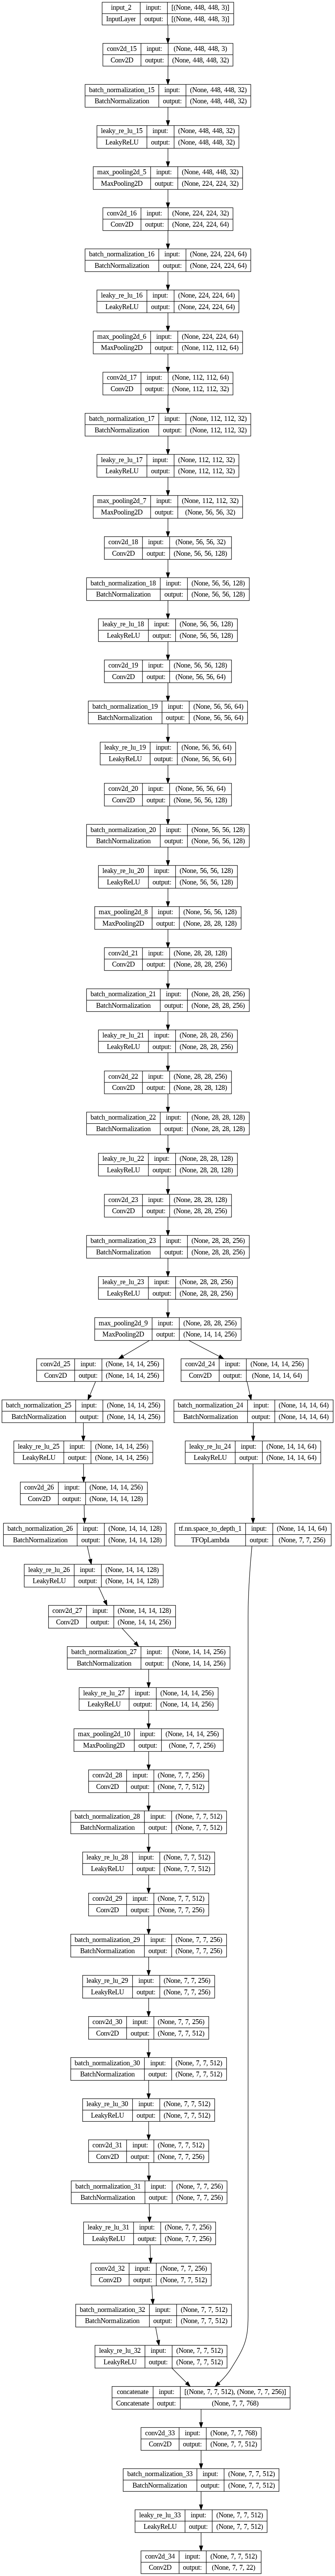

In [76]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [77]:
img_path = '/content/d6-dice/Images'
annotation_path = '/content/d6-dice/Annotations'

In [78]:


class image_data_gen:

    '''
    Image data generator helps to create Dataset pipeline for my own version of
    yolo.It transform images to the target size and also transform the label
    according to the required model.

    Parameters:

    image_path: it take in the path where images are saved
    labels_path: it takes in the path where labels txt file are saved
    batch_size: it take the batch size
    target_size: it the size in which images are resized. It's format is
          (img_size[0],img_size[1],num_channels)
    num_class: number of classes for detection

    Returns:
    (images , labels)
    images format: (batch_size, image_size[0], image_size[1], num_channels)
    labels format: (batch_size, split_size[0], split_size[1],(num_class + 5))
    '''

    def __init__(self,
               image_path=img_path,
               labels_path=annotation_path,
               batch_size=32,
               target_size = (448,448,3),
               num_class = 6,
               num_anchors = 3,
               split_size = 7,
               shuffle = True):


        self.img_path = sorted(glob.glob(image_path + '/*.jpg'))
        self.labels_path = sorted(glob.glob(labels_path + '/*.txt'))
        self.batch_size = batch_size
        self.target_size = target_size
        self.split_size = split_size
        self.num_anchors = num_anchors
        self.num_class = num_class
        self.counter = 0
        self.images = np.zeros((1,self.target_size[0],self.target_size[1],self.target_size[2]))
        self.label_mat = 0
        self.shuffle = shuffle

        if len(self.img_path) != len(self.labels_path):
            raise ValueError('Number of files do not match in provided image path and label path')

    def __iter__(self):
        return self
    def __len__(self):
      return self.batch_size

    def __next__(self):
        low = self.counter * self.batch_size
        high = (self.counter + 1) * self.batch_size

        self.label_mat = self.get_label_matrix(self.labels_path)
        # print(self.label_mat.shape)
        self.images = np.zeros((1,self.target_size[0],self.target_size[1],self.target_size[2]))

        if high >= len(self.img_path):
            high = len(self.img_path)

        ## arr is created for randomising the image dataset and labels
        if self.shuffle:
          np.random.seed(42)
          arr = np.arange(len(self.label_mat))
          np.random.shuffle(arr)
        for i in range(low,high):
          # print('low:',low)
            img = plt.imread(self.img_path[arr[i]])
            img = cv.resize(img,self.target_size[:2]) / 255.
            img = np.expand_dims(img,axis=0)
            self.images = np.append(self.images,img,axis=0)
        if self.counter < len(self.img_path)//self.batch_size:
            self.counter += 1
            return (self.images[1:],self.label_mat[arr[low:high]])
        else:
          self.counter=0
          raise StopIteration

    def get_label_matrix(self,path):
        self.label_mat = np.zeros((1,self.split_size,self.split_size,self.num_anchors * (self.num_class + 5)))
        for i in path:
          ## Creating temporary label matrix
            labels = np.zeros((self.split_size,self.split_size,self.num_anchors * (self.num_class + 5)))
            with open(i) as f:
                for line in f.readlines():
                    classes,x,y,w,h = list(map(float,line.split(' ')))
                    i,j = int(self.split_size * x),int(self.split_size * y)
                    x,y = self.split_size * x - i,self.split_size * y - j
                    w,h = self.split_size * w,self.split_size * h
                    labels[i,j,0],labels[i,j,1]=x,y
                    labels[i,j,2],labels[i,j,3]=w,h
                    labels[i,j,4]=1.0
                    labels[i,j,4+int(classes)]=1

            labels = np.expand_dims(labels,axis=0)
            self.label_mat = np.append(self.label_mat,labels,axis=0)

        return self.label_mat[1:]





In [79]:
## output shape (1,19,19,(2*11))

def intersection_over_union(y_true,pred):

    x1,y1,w1,h1 = y_true[...,0:1],y_true[...,1:2],y_true[...,2:3],y_true[...,3:4]
    x2,y2,w2,h2 = pred[...,0:1],pred[...,1:2],pred[...,2:3],pred[...,3:4]

    box1_x1 = x1 - w1/2
    box1_x2 = x1 + w1/2
    box1_y1 = y1 - h1/2
    box1_y2 = y1 + h1/2

    box2_x1 = x2 - w2/2
    box2_x2 = x2 + w2/2
    box2_y1 = y2 - h2/2
    box2_y2 = y2 + h2/2

    x1 = np.maximum(box1_x1,box2_x1)
    y1 = np.maximum(box1_y1,box2_y1)
    x2 = np.minimum(box1_x2,box2_x2)
    y2 = np.minimum(box1_y2,box2_y2)

    intersection_area = tf.clip_by_value((x2-x1),clip_value_min=0,clip_value_max=100) * \
                      tf.clip_by_value((y2-y1),clip_value_min=0,clip_value_max=100)
    union_area = tf.abs((w1 * h1) + (w2 * h2) - intersection_area + 1e-6)

    return intersection_area/union_area

In [80]:
## pred shape -> (1,19,19,2*11)
## y_true shape -> (1,19,19,11)

class yolo_loss:
    def __init__(self):
        self.mse = tf.keras.losses.MeanSquaredError(reduction='sum')
        self.category_loss = tf.keras.losses.CategoricalCrossentropy()
        self.softmax = tf.keras.layers.Softmax()
        self.lambda_noobj = 0.5
        self.lambda_coord = 5
        self.split_size = 7
        self.classes = 6
        self.anchors = 2

    def __call__(self,y_true,pred):
        # pred = pred.reshape((-1,self.split_size,self.split_size,(self.classes + 5))) # for testing purpose
        # print(type(pred))
        # pred = np.array(tf.reshape(pred,(-1,self.split_size,self.split_size,self.anchors * (self.classes + 5))))
        pred = tf.reshape(pred,(-1,self.split_size,self.split_size,self.anchors * (self.classes + 5))).numpy()
        iou1 = intersection_over_union(y_true[...,:4],pred[...,:4])
        iou2 = intersection_over_union(y_true[...,:4],pred[...,11:15])
#         iou3 = intersection_over_union(y_true[...,:4],pred[...,22:26])
#         iou4 = intersection_over_union(y_true[...,:4],pred[...,33:37])
#         iou5 = intersection_over_union(y_true[...,:4],pred[...,44:48])

        ious = np.concatenate([iou1,
                               iou2
#                                iou3,iou4,iou5
                              ],axis=-1)
        max_arg = np.argmax(ious,axis=-1)
        max_arg = to_categorical(max_arg,num_classes=6 , dtype='int')
        iden_obj = y_true[...,4:5]

        #######################
        ## bounding box loss ##
        #######################
        box_pred = iden_obj * (max_arg[...,0:1] *  pred[0,:,:,:4] + max_arg[...,1:2] * pred[0,:,:,11:15]
#                  + max_arg[...,2:3] * pred[0,:,:,22:26] + max_arg[...,3:4] * pred[0,:,:,33:37] + max_arg[...,4:5] * pred[0,:,:,44:48]
                              )
        box_target = iden_obj * y_true[...,:4]
        box_pred  = box_pred.numpy()
        box_target  = box_target.numpy()
        box_pred[...,2:4]= tf.sqrt(box_pred[...,2:4]).numpy()
        box_loss = self.mse(box_target.flatten(),box_pred.flatten())

        ##############
        ## obj loss ##
        ##############
        box_pred =iden_obj * (max_arg[...,0:1] *  pred[0,:,:,4:5] + max_arg[...,1:2] * pred[0,:,:,15:16]
#                  + max_arg[...,2:3] * pred[0,:,:,26:27] + max_arg[...,3:4] * pred[0,:,:,37:38] + max_arg[...,4:5] * pred[0,:,:,48:49]
                             )
        box_target = iden_obj * y_true[...,4:5]
        box_pred  = box_pred.numpy()
        box_target  = box_target.numpy()
        obj_loss = self.mse(box_target.flatten(),box_pred.flatten())

        #################
        ## no Obj loss ##
        #################
        box_pred =(1 - iden_obj) * (max_arg[...,0:1] *  pred[0,:,:,4:5] + max_arg[...,1:2] * pred[0,:,:,15:16]
#                  + max_arg[...,2:3] * pred[0,:,:,26:27] + max_arg[...,3:4] * pred[0,:,:,37:38] + max_arg[...,4:5] * pred[0,:,:,48:49]
                                   )
        box_target = (1 - iden_obj) * y_true[...,4:5]
        box_pred  = box_pred.numpy()
        box_target  = box_target.numpy()
        no_obj_loss = self.mse(box_target.flatten(),box_pred.flatten())

        ################
        ## class loss ##
        ################
        box_pred =iden_obj * (max_arg[...,0:1] *  pred[0,:,:,5:11] + max_arg[...,1:2] * pred[0,:,:,16:22]
#                  + max_arg[...,2:3] * pred[0,:,:,27:33] + max_arg[...,3:4] * pred[0,:,:,38:44] + max_arg[...,4:5] * pred[0,:,:,49:55]
                             )
        box_target = iden_obj * y_true[...,5:11]
        box_pred  = box_pred.numpy()
        box_target  = box_target.numpy()



        # class_loss = self.category_loss(box_target.numpy().flatten(),box_pred.flatten())
        class_loss = self.mse(box_target.flatten(),box_pred.flatten())
        total_loss = self.lambda_coord * box_loss + obj_loss + self.lambda_noobj * no_obj_loss + class_loss

        return total_loss



In [81]:
class Customfit(tf.keras.models.Model):
  def __init__(self,model):
    super(Customfit,self).__init__()
    self.model=model
  def train_step(self, data):
    x,y=data
    x,y=x.numpy(),y.numpy().flatten()
    print(x.shape)
    print(y.shape)

    with tf.GradientTape() as tape:
      y_pred = self.model(x,training=True)
      y_pred = tf.Variable(y_pred.numpy().flatten())
      loss = self.compiled_loss(
          tf.Variable(y),
          y_pred)
      training_vars = self.trainable_variables
    gradients = tape.gradient(loss,training_vars)
    self.optimizer.apply_gradients(zip(gradients,training_vars))
    self.compiled_metrics.update_state(y,y_pred)
    return {m.name: m.result for m in self.metrics}


In [82]:
def loss_fn2(y_true,pred):
  return tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(y_true,pred))))

In [83]:
train_gen = image_data_gen(target_size=(448,448,3),split_size=7,batch_size = 8,num_anchors=2)
loss = yolo_loss()

In [87]:
# training = Customfit(model)

model.compile(optimizer = 'adam',
              loss = loss_fn2,
              run_eagerly=True
              )

model.fit(train_gen,
          epochs = 5,
          steps_per_epoch = len(train_gen))

Epoch 1/5
8/8 [==============================] - 52s 6s/step - loss: 0.1314
Epoch 2/5
8/8 [==============================] - 39s 5s/step - loss: 0.1238
Epoch 3/5
8/8 [==============================] - 39s 5s/step - loss: 0.1216
Epoch 4/5
5/8 [=================>............] - ETA: 14s - loss: 0.1212

8/8 [==============================] - 25s 3s/step - loss: 0.1212
